In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read the data
df = pd.read_csv('data/data.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [2]:
# split data into train and test
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# scale all data
X = scaler.transform(X)

In [4]:
# Train Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

res_train_df = pd.DataFrame(columns=['1', '100', '1000'], index=['RBF', 'Linear', 'Polynomial', 'Sigmoid'])
res_test_df = pd.DataFrame(columns=['1', '100', '1000'], index=['RBF', 'Linear', 'Polynomial', 'Sigmoid'])

## RBF Kernel

In [5]:
clf = SVC(C=1.0, kernel='rbf')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['RBF']['1'] = acc_train
res_test_df.loc['RBF']['1'] = acc_test

In [6]:
clf = SVC(C=100.0, kernel='rbf')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['RBF']['100'] = acc_train
res_test_df.loc['RBF']['100'] = acc_test

In [7]:
clf = SVC(C=1000.0, kernel='rbf')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['RBF']['1000'] = acc_train
res_test_df.loc['RBF']['1000'] = acc_test

## Linear Kernel

In [8]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['Linear']['1'] = acc_train
res_test_df.loc['Linear']['1'] = acc_test

In [9]:
clf = SVC(C=100.0, kernel='linear')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['Linear']['100'] = acc_train
res_test_df.loc['Linear']['100'] = acc_test

In [10]:
clf = SVC(C=1000.0, kernel='linear')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['Linear']['1000'] = acc_train
res_test_df.loc['Linear']['1000'] = acc_test

## Polynomial Kernel

In [11]:
clf = SVC(C=1.0, kernel='poly')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['Polynomial']['1'] = acc_train
res_test_df.loc['Polynomial']['1'] = acc_test

In [12]:
clf = SVC(C=100.0, kernel='poly')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['Polynomial']['100'] = acc_train
res_test_df.loc['Polynomial']['100'] = acc_test

## Sigmoid Kernel

In [13]:
clf = SVC(C=1.0, kernel='sigmoid')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['Sigmoid']['1'] = acc_train
res_test_df.loc['Sigmoid']['1'] = acc_test

In [14]:
clf = SVC(C=100.0, kernel='sigmoid')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train)
acc_test = accuracy_score(y_pred=y_test_pred, y_true=y_test)

res_train_df.loc['Sigmoid']['100'] = acc_train
res_test_df.loc['Sigmoid']['100'] = acc_test

## Result

In [15]:
res_train_df

,1,100,1000
RBF,0.978901,0.983738,0.986823
Linear,0.978817,0.979068,0.979068
Polynomial,0.978234,0.980485,NaN
Sigmoid,0.872988,0.873071,NaN


In [16]:
res_test_df

,1,100,1000
RBF,0.979685,0.979347,0.978162
Linear,0.980701,0.981039,0.981039
Polynomial,0.9785,0.979685,NaN
Sigmoid,0.868461,0.868461,NaN


# Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameters = {'kernel': ('rbf',), 'C':[1, 10, 100, 500], 'gamma':[0.1, 0.3, 0.5, 0.7, 0.9]}

clf = GridSearchCV(SVC(), parameters)
clf.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 500],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'kernel': ('rbf',)})

In [19]:
pd.DataFrame(clf.cv_results_).loc[:,['param_kernel', 'param_C', 'param_gamma', 'mean_test_score']]

,param_kernel,param_C,param_gamma,mean_test_score
0,rbf,1,0.1,0.977539
1,rbf,1,0.3,0.977875
2,rbf,1,0.5,0.978042
3,rbf,1,0.7,0.977930
4,rbf,1,0.9,0.977986
5,rbf,10,0.1,0.978266
6,rbf,10,0.3,0.978713
7,rbf,10,0.5,0.978433
8,rbf,10,0.7,0.977763
9,rbf,10,0.9,0.977148


In [20]:
parameters = {'kernel': ('linear', ), 'C':[1, 10, 100, 1000]}

clf = GridSearchCV(SVC(), parameters)
clf.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ('linear',)})

In [21]:
pd.DataFrame(clf.cv_results_).loc[:,['param_kernel', 'param_C', 'mean_test_score']]

,param_kernel,param_C,mean_test_score
0,linear,1,0.978657
1,linear,10,0.978657
2,linear,100,0.978768
3,linear,1000,0.978713


In [22]:
parameters = {'kernel': ('poly', ), 'degree':[2, 3, 4], 'C':[1, 10, 100, 500], 'gamma':[0.01, 0.03, 0.05]}

clf = GridSearchCV(SVC(), parameters)
clf.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 500], 'degree': [2, 3, 4],
                         'gamma': [0.01, 0.03, 0.05], 'kernel': ('poly',)})

In [23]:
pd.DataFrame(clf.cv_results_).loc[:,['param_kernel', 'param_degree', 'param_C', 'param_gamma', 'mean_test_score']]

,param_kernel,param_degree,param_C,param_gamma,mean_test_score
0,poly,2,1,0.01,0.964968
1,poly,2,1,0.03,0.970164
2,poly,2,1,0.05,0.971170
3,poly,3,1,0.01,0.958990
4,poly,3,1,0.03,0.969997
5,poly,3,1,0.05,0.971952
6,poly,4,1,0.01,0.949380
7,poly,4,1,0.03,0.965136
8,poly,4,1,0.05,0.968712
9,poly,2,10,0.01,0.970164


# Best Models

In [24]:
import itertools

# This function prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True`.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.9782


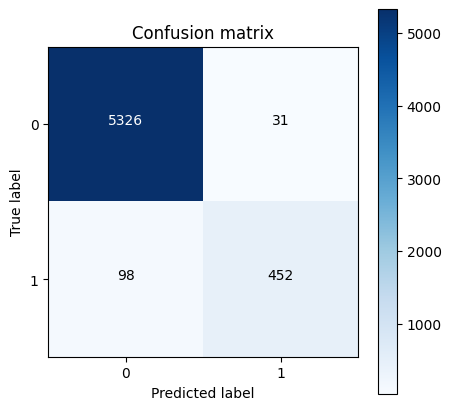

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# best model of part b
clf = SVC(C=1000.0, kernel='rbf')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc = accuracy_score(y_pred=y_test_pred, y_true=y_test)
cm = confusion_matrix(y_pred=y_test_pred, y_true=y_test)

print('Accuracy: %.4f' % acc)
plot_confusion_matrix(cm, classes=y.unique())

Accuracy: 0.9795


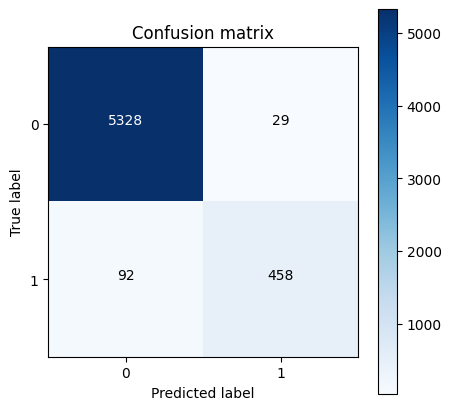

In [26]:
# best model of part c
clf = SVC(C=10.0, gamma=0.3, kernel='rbf')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc = accuracy_score(y_pred=y_test_pred, y_true=y_test)
cm = confusion_matrix(y_pred=y_test_pred, y_true=y_test)

print('Accuracy: %.4f' % acc)
plot_confusion_matrix(cm, classes=y.unique())